Model Training and Testing
--------------------------
Tasks:-<br>
1. Train a regression model
2. Understand train vs test data
3. Evaluate model performance
4. Interpret results like an intern, not a textbook

In [ ]:
# Impoerting necessary libraries and tools
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split # Train Test Split
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score # Model Evaluation Metrics

# For Day 6 : Model comparison task
# Task 1: Import Ridge and Lasso regression models
from sklearn.linear_model import Ridge, Lasso # Regularization Models

In [3]:
# Task 1 :Loading and Preparing Cleaning Data
# Load cleaned data
df = pd.read_csv("../data/processed/cleaned_train.csv")

# Feature Engineering(Encoding categorical variables, Scaling numerical features)
X = df.drop('SalePrice', axis=1)
y = np.log1p(df['SalePrice'])  # log target

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Fixing missing values with 0**
X = X.fillna(0) # Standard practice to handle missing values(Logigal reasoning)

# Check for NaN values after fixing**
print("NaN values in features(X) after fixing:", X.isnull().sum().sum())
print("NaN values in target(Y):", y.isnull().sum()) # NaN values were encountered in target variable

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


NaN values in features(X) after fixing: 0
NaN values in target(Y): 0


In [4]:
# Task 2: Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

What's happening:- <br>
- Train → learn patterns
- Test → simulate unseen data
- Prevents overfitting illusions

In [5]:
# Task 3: Training a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train) # Training the Linear Regression model

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


"ValueError: Input X contains NaN" was encountered in the first execution of the code cell above.<br>
- Key insight:
- Possible causes was missing data of some categories in some rows after encoding.<br>
That's why NaN values were in X(348) and not Y.
0 values were added to the missing values to simulate logical approach of 'nothing was to be recorded'.<br>
- ✔️This is standard industry practice.

- ✔️Lesson is always check for NaN values immediately before modeling

In [6]:
# Task 4: Making Predictions
y_pred = model.predict(X_test)


In [11]:
#Task 5: Evaluating the Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Root Mean Squared Error
print("Linear Regresion RMSE:", rmse) # The lower the RMSE, the better the model's performance

# R^2 score
r2 = r2_score(y_test, y_pred)
print("Liner Regression R²:", r2) # The closer the R^2 score is to 1, the better the model's performance

Linear Regresion RMSE: 0.20899215335950064
Liner Regression R²: 0.7659423997692258


RMSE (log scale)

- Lower = better
- Ours translated close to 0.2089

Compare models using RMSE

R²
Value   |   Meaning<br>
---------------------<br>
0.0	    |   Terrible<br>
0.5	    |   Decent<br>
0.7+    |	Strong<br>
0.9+    |	*Very rare in real data

- 0.765942 translates to a 76.6% of the variation of house prices.

In [8]:
# Task6 :Analyzing Model Coefficients(which features have the most impact on SalePrice)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients.head(10)

,Feature,Coefficient
110,RoofMatl_CompShg,0.346809
114,RoofMatl_Tar&Grv,0.226489
116,RoofMatl_WdShngl,0.168631
115,RoofMatl_WdShake,0.152942
39,MSZoning_RL,0.140169
40,MSZoning_RM,0.111460
214,GarageCond_TA,0.083808
37,MSZoning_FV,0.076283
112,RoofMatl_Metal,0.071639
113,RoofMatl_Roll,0.070984


This answers the question of which features have an impact on the final price of a house(Up or Down).<br>
- RoofMatl_CompShg, RoofMatl_Tar&Grv, RoofMatl_WdShngl, RoofMatl_WdShake, MSZoning_RL, MSZoning_RM, GarageCond_TA<br>
- MSZoning_FV, RoofMatl_Metal, RoofMatl_Roll.

- "These categories tend to increase predicted price relative to the baseline category".

Review questions
----------------
1. Why split data into train and test?
>We split data so the model is evaluated on unseen examples, which simulates real-world performance and prevents misleading results.

2. Why evaluate on test data?
>Test data provides an unbiased estimate of how the model will perform on new, unseen data.

3. What does a R^2 actually tell us?
>R² measures how much of the target’s variability is explained by the model. Some feature are still missing(normal).

4. Is higher R^2 always better?
> No.<br>
- Overfitting can inflate R^2
- Complex models can cheat.
- R^2 ignores business meaning
>A higher R² is better only if the model generalizes well and remains interpretable.

DAY 6: MODEL REGULARISATION
---------------------------
Tasks:-<br>
- 1️⃣ Train Ridge
- 2️⃣ Train Lasso
- 3️⃣ Evaluate & compare
- 4️⃣ Inspect coefficients
- 5️⃣ Decide “best” model

In [9]:
# Task 2: Training Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
# alpha controls how strong the penalty is

#Task 3: Evaluating Ridge model performance
from sklearn.metrics import mean_squared_error, r2_score
# Calculate RMSE and R² for Ridge model
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge RMSE:", ridge_rmse)
print("Ridge R²:", ridge_r2)


Ridge RMSE: 0.1991717540964392
Ridge R²: 0.7874220166251015


In [12]:
# Task 4: Training Lasso regression model
lasso_model = Lasso(alpha=0.001, max_iter=5000)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
# alpha controls how strong the penalty is
# Lasso is sensitive so we set a smaller alpha and increased 'max_iter'

# Task 5: Evaluating Lasso model performance
# Calculate RMSE and R² for Lasso model
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Lasso RMSE:", lasso_rmse)
print("Lasso R²:", lasso_r2)


Lasso RMSE: 0.17117184122687296
Lasso R²: 0.8429899576089592


In [13]:
# Task 6: Comparing Model Performances: Linear, Ridge, and Lasso regression
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'RMSE': [rmse, ridge_rmse, lasso_rmse],
    'R²': [r2, ridge_r2, lasso_r2]
}) # Variable names for the models scores must be the same
print(results)

               Model      RMSE        R²
0  Linear Regression  0.208992  0.765942
1   Ridge Regression  0.199172  0.787422
2   Lasso Regression  0.171172  0.842990


Results:-<br>
- RSME score : Lasso > Ridge > Linear (The lower the better)
- $R^2$ score : Lasso > Ridge > Linear (The one closest to 1)

In [14]:
# Task 7: Inspecting Feature Reduction (Lasso Magic)
lasso_coef = pd.Series(lasso_model.coef_, index=X.columns)
non_zero_features = lasso_coef[lasso_coef != 0]

print(f"Features kept by Lasso: {len(non_zero_features)}")
non_zero_features.sort_values(ascending=False).head(10)
# Shows top 10 features retained by Lasso

Features kept by Lasso: 164


RoofMatl_CompShg    0.219132
RoofMatl_Tar&Grv    0.148626
GrLivArea           0.115698
RoofMatl_WdShngl    0.110577
RoofMatl_WdShake    0.095721
OverallQual         0.071645
YearBuilt           0.049778
RoofMatl_Roll       0.044878
RoofMatl_Metal      0.044230
OverallCond         0.039003
dtype: float64

- Huge Insight: Featues kept by Lasso are 164 with the first starting from approximately (0.219132).

Review
------
1. Which model is best?
>Although Lasso achieved higher R², I would choose Ridge because the dataset contains many correlated features. Ridge reduces overfitting while retaining all features, leading to a more stable and interpretable model for real-world deployment
>- Ridge offers Stability and safety
>- Lasso has better Interpretability(Because of reduced features) leading to better performance.

2. Why Lasso performed better?
Lasso:
- Removed noise 
- Simplified the model
- Reduced variance

The result:
- 164 features left

That means:
- Many original features were weak
- Linear & Ridge were carrying unnecessary complexity(From weak features)

This means that the dataset contained Feature Redudancy.

DAY 7: VISUALIZATION, INTERPRETATION AND STREAMLIT
--------------------------------------------------
- Interpretation of the Model.
- Using the chosen Ridge model.

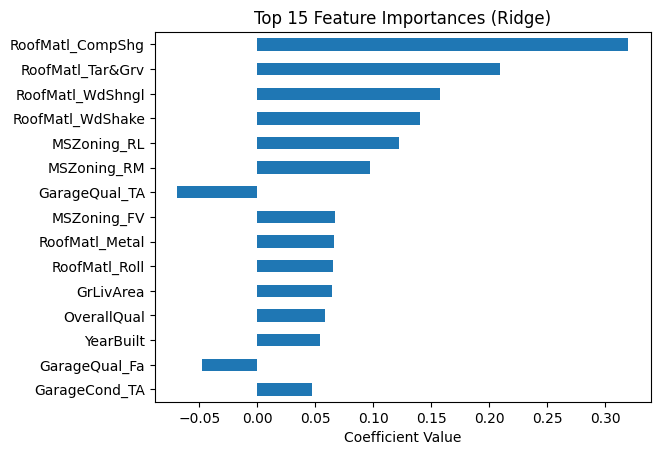

In [15]:
# Task 1: Coefficient Analysis(Feature Importance)
import matplotlib.pyplot as plt

ridge_coef = pd.Series(ridge_model.coef_, index=X.columns)

top_features = ridge_coef.sort_values(key=abs, ascending=False).head(15)

# Plotting the top 15 features using horizontal bar graph
plt.figure()
top_features.plot(kind='barh')
plt.title("Top 15 Feature Importances (Ridge)")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis() # Highest at the top
plt.show()
# Answers what drives house prices

Interpretation

>Top feature is RoofMatl_CompShg (0.3) followed by RoofMatl_Tar&Grv (0.2)

This suggests that:-
- Roof material has a strong influence on sale price
- These materials act as proxies for house quality
- The coefficients being relatively large confirms the model is picking up structural factors, not noise

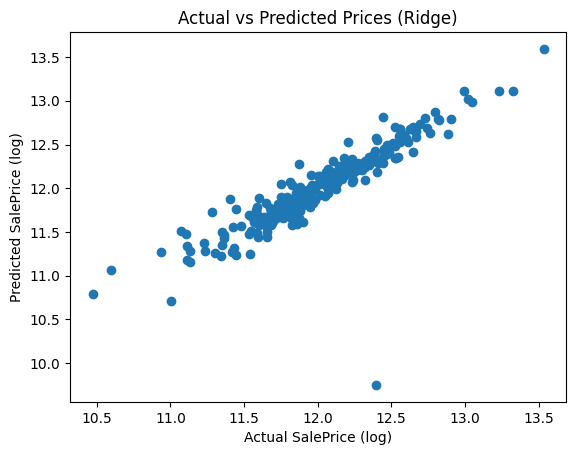

In [17]:
# Task 2: Prediction vs Actual Values
y_pred_ridge = ridge_model.predict(X_test)

# Scatter plot of Actual vs Predicted values
plt.figure()
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Actual SalePrice (log)") # Transformed Actual SalePrice
plt.ylabel("Predicted SalePrice (log)") # Transformed Predicted SalePrice
plt.title("Actual vs Predicted Prices (Ridge)") # For Ridge regression
plt.show()


Interpretation:

- The predictions follow the actual values closely along the diagonal, indicating good overall fit. However, dispersion increases at the extremes, suggesting the model is less confident for very low and very high-priced houses.
- Middle-range houses are easy to predict as compared to the *Extremes.

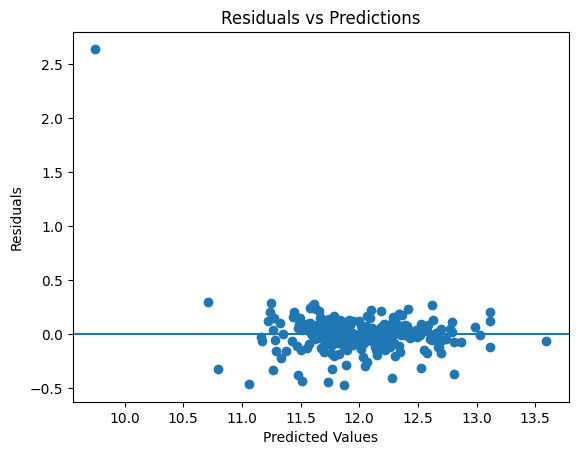

In [18]:
# Task 3: Residual Analysis (Error Analysis)
residuals = y_test - y_pred_ridge

# Scatter plot of Residuals vs Predicted values
plt.figure()
plt.scatter(y_pred_ridge, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()


In [22]:
# Task 4: Save Model and Scaler(Deployment Preparation)
import joblib

# Saving the Ridge model and scaler
joblib.dump(ridge_model, '../models/ridge_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']